In [1]:
import sys

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')

/opt/conda/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


AttributeError: 'XAxis' object has no attribute 'set_xticklabels'

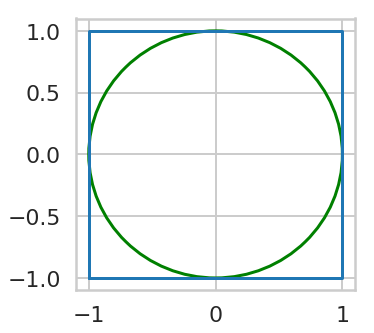

In [3]:
fig = plt.figure(figsize=(5,5))

# plot the box:
corners = [(-1,-1),(-1,1),(1,1),(1,-1),(-1,-1)]
x = list(zip(*corners))[0]
y = list(zip(*corners))[1]
plt.plot(x, y, lw=3)
# note: the code above is equivalent to
# plt.plot([-1,-1,1,1,-1],[-1,1,1,-1,-1], lw=3)

# plot the circle:
ax = fig.add_subplot(1,1,1)
circle = plt.Circle((0,0), radius=1, color='g', fill=False, lw=3)
ax.add_patch(circle)

plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
ax.xaxis.set_xticklabels([])
ax.yaxis.set_yticklabels([])

plt.savefig('circle_in_box.png', bbox_inches='tight', dpi=144)
plt.show()

In [ ]:
# return an array of random numbers
# in the range from 0 to 1
np.random.uniform(0, 1, size=2)

In [ ]:
# we can define the exact value of Pi
# using the inverse tangent function
Pi = 4*np.arctan(1)

# this is equivalent to numpy.pi
print(Pi == np.pi)

In [ ]:
def approximate_pi(number_of_throws):
    hits = 0
    for i in range(number_of_throws):
        x, y = np.random.uniform(0, 1, size=2)
        r = (x**2 + y**2)**0.5
        hits = hits + 1*(r < 1)
    return hits/number_of_throws*4

In [ ]:
a = [10, 100, 1000, 10000, 100000, 300000, 500000, 1000000, 2000000, 5000000, 10000000, 50000000]
a = [10, 100, 1000, 10000, 100000, 300000, 500000, 1000000, 2000000]

y = [approximate_pi(i) for i in a]

In [ ]:
yy = [np.abs((pi_approx-Pi)/Pi) for pi_approx in y]
plt.semilogx(a,yy)
plt.ylim(0, 0.06)
plt.title("Approximating Pi with Monte Carlo simulations", fontsize=20, y=1.03)
plt.ylabel("Error", labelpad=20)
plt.xlabel("Number of sampling points", labelpad=20)
#plt.ylim(3.140, 3.142)
print(y)

In [ ]:
sample_numbers = np.logspace(1, 6, num=100)
pi_approximations = [approximate_pi(int(i)) for i in sample_numbers]

In [ ]:
error = [np.abs((i-Pi)/Pi) for i in pi_approximations]
plt.semilogx(sample_numbers, error)
plt.ylim(0, 0.08)
plt.title("Approximating Pi with Monte Carlo simulations", fontsize=20, y=1.03)
plt.ylabel("Error", labelpad=20)
plt.xlabel("Number of sampling points", labelpad=20)
plt.savefig('pi_error.png', bbox_inches='tight', dpi=144)
plt.show()

In [ ]:
def approximate_pi_tracker(number_of_throws):
    hits = 0
    xlist = []
    ylist = []
    for i in range(number_of_throws):
        x, y = np.random.uniform(0, 1, size=2)
        r = (x**2 + y**2)**0.5
        hits = hits + 1*(r < 1)
        xlist.append(x)
        ylist.append(y)
    return hits/number_of_throws*4, xlist, ylist

In [ ]:
fig = plt.figure(figsize=(10,10))

# plot the box:
corners = [(0,0),(0,1),(1,1),(1,0),(0,0)]
x = list(zip(*corners))[0]
y = list(zip(*corners))[1]
plt.plot(x, y, lw=3)
# note: the code above is equivalent to
# plt.plot([-1,-1,1,1,-1],[-1,1,1,-1,-1], lw=3)

# plot the quarter circle:
x = np.linspace(0,1,100)
plt.plot(x, (1-x**2)**(0.5), lw=3)

# plot the sampling points
pi_approx, x, y = approximate_pi_tracker(100)
plt.scatter(x, y, color='r', s=1)

# make a text box with some information
box = dict(boxstyle='square', facecolor='white', alpha=0.9)
plt.text(0.04, 0.05,
         '{0:4.2f}% of samples in circle,\nPi approximation = {1:5.4f}...'
         .format(pi_approx/4*100, pi_approx), bbox=box)

plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)

plt.savefig('pi_approx.png', bbox_inches='tight', dpi=144)